**Bagging & Boosting KNN & Stacking**

---



1 : **What is the fundamental idea behind ensemble techniques? How does**
**bagging differ from boosting in terms of approach and objective**?

---
Ans: **Fundamental Idea**


The main idea behind ensemble techniques is to combine the predictions of multiple models to get a better and more accurate final result.  
Instead of depending on a single model, ensemble methods use many models (often called “weak learners”) and merge their outputs.  
This helps to reduce errors, improve accuracy, and make the predictions more stable and reliable.



### Bagging (Bootstrap Aggregating)

**Bagging** works by training several models **independently** on **different random samples** of the same dataset (with replacement).  
Each model gives a prediction, and the final output is usually the **average** (for regression) or **majority vote** (for classification) of all models.

- **Goal:** Reduce **variance** and prevent overfitting.  
- **Key idea:** Models are trained in parallel and independently.  
- **Example:** Random Forest uses bagging with Decision Trees.


### Boosting

**Boosting** builds models **sequentially**, where each new model tries to fix the mistakes made by the previous one.  
It gives more weight to data points that were predicted incorrectly so the next model focuses on them.

- **Goal:** Reduce **bias** and improve overall accuracy.  
- **Key idea:** Models are trained one after another, each improving the previous.  
- **Example:** AdaBoost, Gradient Boosting, XGBoost.




2: **Explain how the Random Forest Classifier reduces overfitting compared to**
**a single decision tree. Mention the role of two key hyperparameters in this** **process**.

---
Ans: **How Random Forest Reduces Overfitting**

A **single decision tree** often fits too closely to the training data, which can lead to **overfitting** — meaning it performs well on training data but poorly on new data.

A **Random Forest** helps solve this problem by creating **many different decision trees** and combining their results.  
Each tree is trained on a **random subset of data** and uses a **random selection of features** at each split.  
This randomness makes the trees less correlated and prevents them from all making the same mistakes.

In the end, the Random Forest takes the **majority vote** (for classification) or **average** (for regression) of all trees, which smooths out errors and gives more stable, general predictions.


### Key Hyperparameters That Help Reduce Overfitting

1. **n_estimators**  
   - This controls the **number of trees** in the forest.  
   - More trees usually lead to better and more stable results, but increase computation time.  
   - A higher value helps reduce overfitting because the final decision is based on many trees, not just one.

2. **max_features**  
   - This defines the **number of features** considered when splitting a node.  
   - By limiting the number of features, trees become more diverse.  
   - This randomness prevents trees from being too similar, reducing overfitting.






3: **What is Stacking in ensemble learning? How does it differ from traditional**
**bagging/boosting methods? Provide a simple example use case**.

---
Ans:
**Stacking (Stacked Generalization)** is an ensemble learning method that combines **different types of models** to make a stronger final model.  
Instead of using the same model repeatedly (like in bagging or boosting), stacking blends the predictions of several **different** models and uses another model (called a **meta-model**) to make the final prediction.

For example, we might combine predictions from a Decision Tree, SVM, and Logistic Regression, and then use another model (like Linear Regression) to learn how to best combine their outputs.



### How Stacking Differs from Bagging and Boosting

| Aspect | Bagging | Boosting | Stacking |
|---------|----------|-----------|-----------|
| Model Type | Same type (e.g., many Decision Trees) | Same type (trained sequentially) | Different models combined together |
| Training | Parallel (independent models) | Sequential (each fixes the previous) | Two levels — base models and meta-model |
| Main Goal | Reduce variance | Reduce bias | Combine strengths of multiple models |
| Example | Random Forest | AdaBoost, XGBoost | Combining SVM + Decision Tree + Logistic Regression |

**In simple terms:**  
- **Bagging** → Same models, trained independently.  
- **Boosting** → Same models, trained one after another to fix errors.  
- **Stacking** → Different models, combined by another model for the final decision.


### Example Use Case

Suppose you are predicting whether a bank customer will default on a loan.  
You can:
- Train a **Decision Tree**, **Logistic Regression**, and **SVM** separately.  
- Then, use a **meta-model** (like Random Forest) to take their predictions as inputs and make the final decision.

This approach often gives higher accuracy because it combines the strengths of all models.


### Summary

- **Stacking** combines predictions from different models using a meta-model.  
- It often performs better than bagging or boosting because it blends the unique strengths of various algorithms.  
- Useful when you want the best performance by combining models that learn in different ways.



4: **What is the OOB Score in Random Forest, and why is it useful? How does**
***it help in model evaluation without a separate validation set***?

---
Ans:
The **OOB (Out-of-Bag) Score** is a built-in method in Random Forest that helps evaluate the model’s performance **without needing a separate validation set**.

When building each tree in a Random Forest, the algorithm uses a random sample of the training data **with replacement**.  
This means some data points are not used to train that tree — those unused samples are called **Out-of-Bag (OOB)** samples.


### Why It’s Useful

- OOB samples act like a **mini test set** for each tree.  
- After training, each OOB sample is used to test the trees that did not see it during training.  
- The model’s overall OOB score is the **average accuracy** of all predictions made on these OOB samples.

This gives a reliable estimate of how well the model might perform on new, unseen data.



### How It Helps Without a Validation Set

Because OOB samples are automatically set aside during training, the model can:
- Evaluate itself **internally** using those samples.
- Avoid splitting the dataset into separate training and validation sets.
- Save time and data, especially when the dataset is small.




5: **Compare AdaBoost and Gradient Boosting in terms of**:

● **How they handle errors from weak learners**

● **Weight adjustment mechanism**

● **Typical use cases**

---
Ans:
### 1. How They Handle Errors from Weak Learners

- **AdaBoost:**  
  AdaBoost focuses on the mistakes made by previous weak learners.  
  It increases the **weight of misclassified samples**, so the next learner pays more attention to the harder cases.  
  Each new model tries to fix the specific errors made by the previous ones.

- **Gradient Boosting:**  
  Gradient Boosting also builds models one by one, but it does this by **reducing the overall prediction error** (residual).  
  Each new model learns to predict the **residual errors** (difference between actual and predicted values) of the combined previous models.


### 2. Weight Adjustment Mechanism

- **AdaBoost:**  
  - Increases the weight of misclassified samples.  
  - Decreases the weight of correctly classified samples.  
  - The final prediction is a weighted vote of all models.  

- **Gradient Boosting:**  
  - No explicit weights on samples.  
  - Instead, each new model minimizes a **loss function** (like mean squared error or log loss) using **gradient descent**.  
  - The focus is on improving where the model’s predictions are still weak.


### 3. Typical Use Cases

| Algorithm | Common Use Cases | Description |
|------------|------------------|--------------|
| **AdaBoost** | Spam detection, face recognition, simple binary classification | Works best on clean, smaller datasets and when fast training is needed |
| **Gradient Boosting** | Credit scoring, medical diagnosis, large tabular data | Works better on complex data and can achieve higher accuracy with tuning |




- **AdaBoost** is simpler and faster, great for smaller datasets.  
- **Gradient Boosting** is more flexible and powerful, suitable for large or complex problems where fine-tuned accuracy matters.



6: **Why does CatBoost perform well on categorical features without requiring**
**extensive preprocessing? Briefly explain its handling of categorical variables**.

---
Ans:
**CatBoost** (*Categorical Boosting*) is a gradient boosting algorithm designed to handle **categorical features automatically**, without needing heavy preprocessing like one-hot encoding or label encoding.

In most machine learning models, categorical data must be converted into numbers first.  
However, CatBoost can process these features directly, which saves time and helps prevent data leakage or bias.


### CatBoost Handles Categorical Variables

1. **Uses Target-Based Statistics (Mean Encoding):**  
   - CatBoost converts each categorical value into a **numeric statistic** based on the target variable.  
   - For example, if you’re predicting whether a customer will buy a product, it calculates how often each category (like “City” or “Gender”) is linked to a positive outcome.  
   - This transformation is done carefully to avoid overfitting by using random permutations of data.

2. **Ordered Encoding (Prevents Data Leakage):**  
   - Instead of using the target from the entire dataset, CatBoost encodes each data point using only the **previous samples** in a random order.  
   - This ensures the model doesn’t “peek” at future data, maintaining fairness and accuracy.

3. **Efficient Handling of High-Cardinality Features:**  
   - CatBoost efficiently handles features with many unique categories (like user IDs or product names) by combining them in a way that reduces noise.



### Why It’s Useful

- No need for manual encoding like one-hot or label encoding.  
- Avoids overfitting caused by improper target encoding.  
- Works well with mixed datasets (both categorical and numerical data).  
- Saves preprocessing time and improves accuracy.



### Example Use Case

Suppose you’re predicting whether a user will click an ad.  
Categorical features like **device type**, **region**, or **browser** can be directly used in CatBoost without converting them manually — and the model will still perform very well.





In [2]:
# 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization
# Task:
# 1. Load the Wine dataset (sklearn.datasets.load_wine()).
# 2. Split data into 70% train and 30% test.
# 3. Train a KNN classifier (default K=5) without scaling and evaluate using:

# a. Accuracy
# b. Precision, Recall, F1-Score (print classification report)

# 4. Apply StandardScaler, retrain KNN, and compare metrics.
# 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).
# 6. Train the optimized KNN and compare results with the unscaled/scaled versions.

# Ans:

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Dataset loaded and split successfully.\n")

knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

print("=== Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== With Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

param_grid = {'n_neighbors': range(1, 21),'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("\n=== GridSearchCV Results ===")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN (with scaling) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Dataset loaded and split successfully.

=== Without Scaling ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== With Scaling ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== GridSearchCV Results ===
Best Parameters:

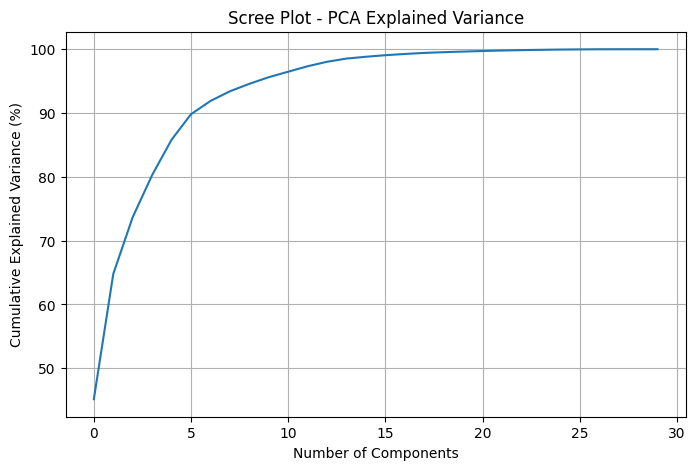

Original features: 30
Reduced features (95% variance): 10

=== KNN on Original Data ===
Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        64
           1       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


=== KNN on PCA-Reduced Data ===
Accuracy: 0.9532163742690059
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



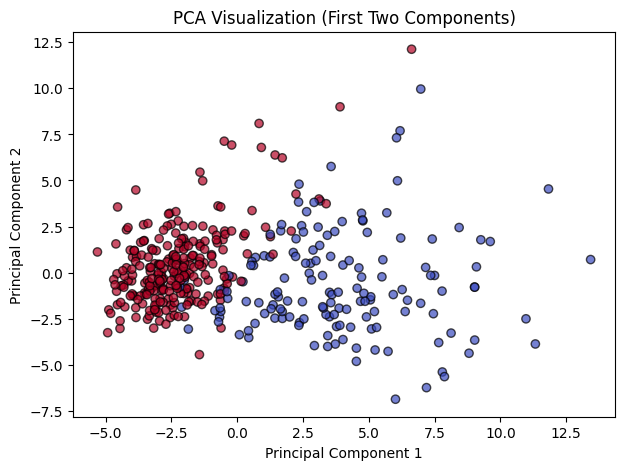

In [3]:
# 8 : PCA + KNN with Variance Analysis and Visualization
# Task:
# 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
# 2. Apply PCA and plot the scree plot (explained variance ratio).
# 3. Retain 95% variance and transform the dataset.
# 4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
# 5. Visualize the first two principal components using a scatter plot (color by class).

# Ans:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot - PCA Explained Variance')
plt.grid(True)
plt.show()

pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)

print(f"Original features: {X.shape[1]}")
print(f"Reduced features (95% variance): {X_train_pca.shape[1]}\n")

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)

print("=== KNN on Original Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Classification Report:\n", classification_report(y_test, y_pred_original))

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

print("\n=== KNN on PCA-Reduced Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_train_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (First Two Components)')
plt.show()



=== KNN Regressor (K=5) ===
Mean Squared Error (Euclidean): 4989.29
Mean Squared Error (Manhattan): 5558.44


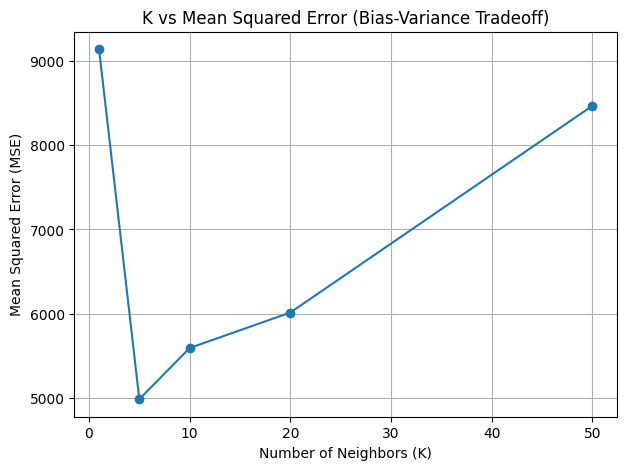


Best K (lowest MSE): 5


In [4]:
# 9:KNN Regressor with Distance Metrics and K-Value Analysis

# Task:

# 1. Generate a synthetic regression dataset
# (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
# 2. Train a KNN regressor with:

    # a. Euclidean distance (K=5)
    # b. Manhattan distance (K=5)
    # c. Compare Mean Squared Error (MSE) for both.
# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

# Ans:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("=== KNN Regressor (K=5) ===")
print(f"Mean Squared Error (Euclidean): {mse_euclidean:.2f}")
print(f"Mean Squared Error (Manhattan): {mse_manhattan:.2f}")

k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(7,5))
plt.plot(k_values, mse_values, marker='o')
plt.title('K vs Mean Squared Error (Bias-Variance Tradeoff)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

best_k = k_values[np.argmin(mse_values)]
print(f"\nBest K (lowest MSE): {best_k}")


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtyp

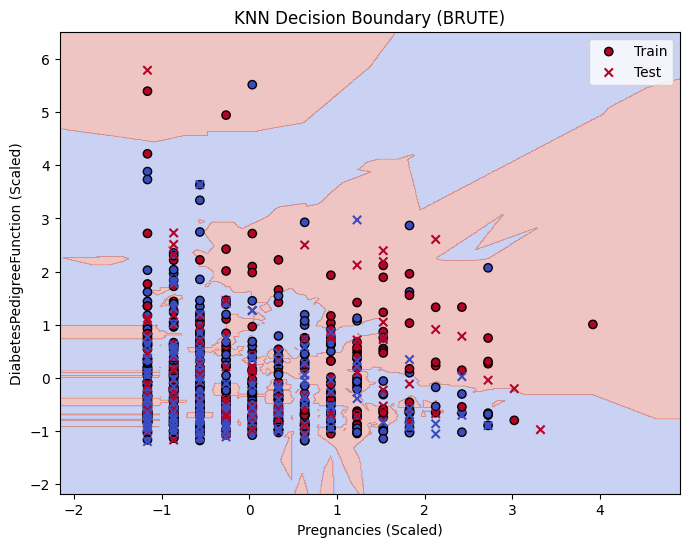

In [19]:
# 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
# Task:
# 1. Load the Pima Indians Diabetes dataset (contains missing values).
# 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
# 3. Train KNN using:
   # a. Brute-force method
   # b. KD-Tree
   # c. Ball Tree
# 4. Compare their training time and accuracy.
# 5. Plot the decision boundary for the best-performing method (use 2 most important features).

# Dataset: Pima Indians Diabetes

# Ans:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import requests
from io import StringIO

# Download the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
response = requests.get(url)
data = StringIO(response.text)

# Load the dataset, specifying column names as there is no header
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(data, names=column_names)


print(df.head())
print("\nMissing values per column:\n", df.isnull().sum())

# The dataset uses 0 to represent missing values in some columns, which is incorrect.
# Replace 0 with NaN in relevant columns before imputation
cols_with_zeros_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros_as_missing] = df[cols_with_zeros_as_missing].replace(0, np.nan)

print("\nMissing values after replacing 0 with NaN:\n", df.isnull().sum())

imputer = KNNImputer(n_neighbors=5)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train_scaled, y_train)
    end = time.time()

    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    results[algo] = {'accuracy': acc, 'train_time': end - start}
    print(f"{algo.upper()} - Accuracy: {acc:.4f}, Training Time: {end - start:.4f} seconds")

best_algo = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest Algorithm: {best_algo.upper()}")

# For visualization, let's use the two features with the least number of missing values after replacing 0s with NaN
# Assuming 'Pregnancies' is the first column (index 0) and 'DiabetesPedigreeFunction' is the seventh column (index 6)
# based on the original column names list
X_vis_train = X_train_scaled[:, [0, 6]]
X_vis_test = X_test_scaled[:, [0, 6]]


knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_vis_train, y_train)


x_min, x_max = X_vis_train[:, 0].min() - 1, X_vis_train[:, 0].max() + 1
y_min, y_max = X_vis_train[:, 1].min() - 1, X_vis_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_vis_train[:,0], X_vis_train[:,1], c=y_train, edgecolor='k', cmap='coolwarm', label='Train')
plt.scatter(X_vis_test[:,0], X_vis_test[:,1], c=y_test, marker='x', cmap='coolwarm', label='Test')
plt.xlabel('Pregnancies (Scaled)') # Label updated to reflect the features used
plt.ylabel('DiabetesPedigreeFunction (Scaled)') # Label updated to reflect the features used
plt.title(f'KNN Decision Boundary ({best_algo.upper()})')
plt.legend()
plt.show()